In [1]:
import pandas as pd

In [2]:
path='C:/Users\dmckenzie\OneDrive - DLR Group\Desktop\JusticeRoomsComplete.csv'

In [3]:
DATIS=pd.read_csv(path)

In [4]:
DATIS[DATIS['Label2']!='Junk'].drop_duplicates(['RoomName'])

,Unnamed: 0,Unnamed: 0.1,NameFilter,RoomModelId,ProjectName,RoomId,RoomName,Name2,Cluster,Label,ClustTotal,ClustRoomTotal,ClustRoomTypePorp,Tokenized,Label2,Label3
0,0,0,aca,-932672949,EL PASO COUNTY - CRIMINAL JUSTICE CENTER,-932672949:3059719,ACA,aca,-1,office officer court courts,5484,4,0.00,['aca'],junk,junk
4,4,4,aca compliance coordinator,1904761374,NEW CORRECTIONAL FACILITIES LEASE,1904761374:8992472,ACA COMPLIANCE COORDINATOR,aca compliance coordinator,65,coordinator aca,22,5,0.23,"['aca', 'compliance', 'coordinator']",general office,general office
9,9,9,acc cell,-1969737280,KINGS COUNTY JUVENILE CENTER,-1969737280:2029424,ACC. CELL,acc cell,37,cell cells isolation,2890,8,0.00,"['acc', '.', 'cell']",general cell,general cell
17,17,17,acc single,1316760683,NaN,1316760683:2695459,ACC. SINGLE,acc single,-1,office officer court courts,5484,2,0.00,"['acc', '.', 'single']",junk,junk
19,19,19,acc visit,675607710,TULARE CO. SEQUOIA FIELD PROG.,675607710:2332192,ACC. VISIT,acc visit,58,visit visiting video,301,1,0.00,"['acc', '.', 'visit']",visitation,visitation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27917,27917,27917,workstations,1282913660,JOINT REGIONAL CONFINEMENT FACILITY,1282913660:3265061,WORKSTATIONS,workstations,67,workstations workstation station stations,82,2,0.02,['workstations'],workstations workstation station stations,workstations workstation station stations
27919,27919,27919,wrk,-1610523404,SANTA RITA JAIL SB863 HEALTH PROGRAM SERVICES ...,-1610523404:2364557,WRK RM,wrk rm,-1,office officer court courts,5484,2,0.00,"['wrk', 'rm']",junk,junk
27921,27921,27921,x_chase,2104154140,KINGS COUNTY JUVENILE CENTER,2104154140:4478027,X_CHASE,x_chase,81,warewashing warewash shwr,2387,4,0.00,['x_chase'],junk,junk
27925,27925,27925,youth,-1008034871,GREEN HILL SCHOOL RECREATION BUILDING,-1008034871:2082851,YOUTH RR,youth rr,-1,office officer court courts,5484,7,0.00,"['youth', 'rr']",toilet,toilet


In [5]:
import re
def preprocessor(text): 
    text = re.sub(r'[^\w\s]','', text)
    text = text.lower()
    return text

In [6]:
DATIS['RoomName'].apply(preprocessor)

0                               aca
1                               aca
2                               aca
3                               aca
4        aca compliance coordinator
                    ...            
27929                      youth rr
27930                      youth rr
27931                      youth rr
27932        youth victim interview
27933        youth victim interview
Name: RoomName, Length: 27934, dtype: object

In [7]:
DATIS['CleanName']=DATIS['RoomName'].str.replace('/',' ').replace({' +':' '},regex=True).apply(preprocessor)

In [8]:
len(DATIS['RoomName'].value_counts())-len(DATIS['CleanName'].value_counts())

299

In [9]:
DATIS['NameLen']=DATIS['RoomName'].str.len()
DATIS['RoomName']=DATIS['RoomName'].str.lower()
DATIS['TokenCount']=((DATIS['RoomName'].str.len()-DATIS['RoomName'].str.replace(' ','').str.len())+1)

<AxesSubplot:>

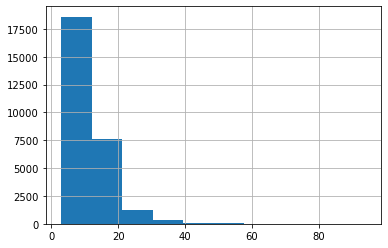

In [10]:
DATIS['NameLen'].hist()

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle

In [12]:
import pandas as pd
import numpy as np
from numpy import random
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [13]:
DATIS.Label2=DATIS.Label2.str.lower()

In [14]:
DATIS['RoomType']=np.where((DATIS.Label2.str.contains('|'.join(['dining','laundry']))) | (DATIS.Label2=='junk'),'other',
                           np.where(DATIS.CleanName.str.contains('corridor'),'corridor vestibule',
                           DATIS['Label2']))

In [15]:
pd.set_option('display.max_rows', 300)
DATIS.drop_duplicates(['RoomType','CleanName']).groupby(['RoomType'])['RoomType'].count()

RoomType
bailiff                                        1
balcony                                        4
booking law                                   17
break room                                    15
cart carts handling                           13
chase                                          5
circulation                                   13
classroom                                     16
closet jan                                    30
coffee cafe                                    9
communication communications telecom          13
conference                                    41
control                                       26
cooler freezer freezers                       13
corridor hallway                              13
corridor vestibule                            38
court                                        117
courtyard outdoor                              9
day room                                      90
dental dentist                                24
detox      

In [16]:
binomiallist=[]
for i in range(0,len(DATIS)):
        binomiallist.append(np.random.binomial(1, .03))

In [17]:
DATIS['Keep']=binomiallist
DATIS['Keep']=np.where((DATIS['RoomType']=='other') | (DATIS['RoomType']=='generic office'),DATIS['Keep'],1)

In [18]:
DATIS[(DATIS['RoomType']=='other') | (DATIS['RoomType']=='generic office')]['Keep'].value_counts()

0    3404
1      93
Name: Keep, dtype: int64

In [19]:
DATIS2=DATIS[DATIS['Keep']==1]

In [20]:
DATIS2['Dummy']=1

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
len(DATIS2)

24530

In [22]:
DATIS2['cSum']=DATIS2.groupby(['RoomType', 'CleanName'])['Dummy'].transform('cumsum')

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
DATIS2=DATIS2[DATIS2['cSum']<41]

In [24]:
#DATIS2=DATIS2.drop_duplicates(['RoomType','CleanName'])

In [25]:
y = DATIS2.RoomType.str.lower()

In [26]:
DATIS2['Name'] = DATIS2['CleanName']

In [27]:
X = DATIS2['Name']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 44)

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [30]:

#finding

from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


parameters = {
    #'tfidf__ngram_range': ((1, 1), (1, 2),(1, 3),(1,4)), 
    'tfidf__max_df': (0.25,.4 ,0.5,.6,0.75, 1.0),
    'tfidf__use_idf': (True, False),
    'tfidf__sublinear_tf': (True, False),
    'tfidf__smooth_idf' : (True, False),
    'tfidf__min_df' : (1, 2,3),
    'tfidf__norm': ('l1', 'l2'),
    #'clf__alpha': (0.00001, 0.000001,0.0001,0.001,0.01)
    #'clf__loss': ('log', 'perceptron'),
    #'clf__loss': ('hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'),
    #'clf__penalty': ('l2', 'elasticnet','l1')
}


pipeline = Pipeline([
               ('tfidf', TfidfVectorizer()),
               ('clf', SGDClassifier(loss='log',penalty='l1')),
              ])

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = grid_search.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


accuracy 0.9752802529462489
                                           precision    recall  f1-score   support

                                  bailiff       1.00      1.00      1.00         3
                                  balcony       1.00      1.00      1.00         8
                              booking law       1.00      1.00      1.00        13
                               break room       1.00      0.97      0.98        31
                      cart carts handling       1.00      1.00      1.00        13
                                    chase       1.00      1.00      1.00        14
                              circulation       0.96      1.00      0.98        26
                                classroom       1.00      1.00      1.00        32
                               closet jan       0.99      0.96      0.97        80
                              coffee cafe       1.00      1.00      1.00        13
     communication communications telecom       0.96      

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
ToScore=pd.read_excel('C:/Users\dmckenzie\Downloads\FINAL Space Program Swan Annex_CLARITY (2).xls')
ToScore.head(2)

,Department,sub-department,Component Number,Type,Component Name,Unnamed: 5,Number of Areas,Unnamed: 7,NSF,level
0,FACILITY MAIN ENTRANCE,MAIN LOBBY / SECURITY SCREENING,1.101,NaN,Entry Vestibule,1.0,1,100,100,1
1,FACILITY MAIN ENTRANCE,MAIN LOBBY / SECURITY SCREENING,1.102,NaN,Public Lockers Alcove,10.0,1,2,20,1


In [59]:
ToScore['CleanName']=ToScore['Component Name'].str.replace('/',' ').replace({' +':' '},regex=True).apply(preprocessor)
ToScore['Preds']=grid_search.predict(ToScore['CleanName'])
ToScore.head(2)

,Department,sub-department,Component Number,Type,Component Name,Unnamed: 5,Number of Areas,Unnamed: 7,NSF,level,CleanName,Preds
0,FACILITY MAIN ENTRANCE,MAIN LOBBY / SECURITY SCREENING,1.101,NaN,Entry Vestibule,1.0,1,100,100,1,entry vestibule,entrance
1,FACILITY MAIN ENTRANCE,MAIN LOBBY / SECURITY SCREENING,1.102,NaN,Public Lockers Alcove,10.0,1,2,20,1,public lockers alcove,locker


In [60]:
grid=pd.read_csv('C:/Users\dmckenzie\gridtest.csv')
grid.head(2)

,Room Cluster,bed bunk detention,bench,chair,desk,desk detention,desk pedestal,medical bed,medical table,phone,seat,shelf shelving shelves,stacking chair,stool mtd,table,television,video visitation,waste trash,workstation ped
0,booking law,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,break room,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [62]:
ToScore.set_index('Preds').join(grid.set_index('Room Cluster'))

,Department,sub-department,Component Number,Type,Component Name,Unnamed: 5,Number of Areas,Unnamed: 7,NSF,level,...,phone,seat,shelf shelving shelves,stacking chair,stool mtd,table,television,video visitation,waste trash,workstation ped
booking law,INTAKE/TRANSFERS/RELEASE,Initial Receiving,5.304,NaN,Booking / Release Counter,2.0,1,64,128,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
break room,EXECUTIVE ADMINISTRATION,NaN,2.111,break,Break Room/Pantry/Coffee,6.0,1,15,90,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
break room,STAFF SUPPORT,STAFF BREAK AREA,3.201,break,Breakroom / Lounge,12.0,1,20,240,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
cart carts handling,LAUNDRY,NaN,12.106,NaN,Cart Cleaning / Washing Area,1.0,1,60,60,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cart carts handling,LAUNDRY,NaN,12.107,NaN,Cart Storage,1.0,1,100,100,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
waiting intake,INTAKE/TRANSFERS/RELEASE,Initial Receiving,5.309,inmate waiting,Open Waiting,4.0,1,15,60,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
waiting intake,INTAKE/TRANSFERS/RELEASE,Transports/Transfers/Release Processing,5.327,NaN,Release Processing Station / Waiting Area,4.0,1,15,60,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
waiting intake,INTAKE/TRANSFERS/RELEASE,CLASSIFICATION,5.404,inmate waiting,Open Waiting - Male / Female,6.0,1,15,90,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
waiting intake,HEALTHCARE CLINIC AND MEDICAL INFIRMARY (11 BEDS),MEDICAL CLINIC,10.102,inmate waiting,Waiting Area,4.0,1,15,60,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [107]:
#ToScore.to_csv('SpaceProgramClassed.csv')

In [54]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


tfidfvec=TfidfVectorizer(ngram_range=(1,3),max_df=.25,min_df=1,norm='l2',smooth_idf=True,sublinear_tf=False,use_idf=True)
mod=SGDClassifier(penalty='l1',loss='log',alpha=0.00001)

#vectorizer.fit(X_train)
#X_train2=vectorizer.transform(X_train)
#X_test2=vectorizer.transform(X_test)




text_clf = Pipeline([ 
    ('tfidf', tfidfvec),
    ('clf', mod),
])


text_clf.fit(X_train, y_train)

#mod.fit(X_train2, y_train)

from sklearn.metrics import classification_report
#y_pred = mod.predict(X_test2)
y_pred2 = text_clf.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred2, y_test))
print(classification_report(y_test, y_pred2))


#print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred))

accuracy 0.9890898650588573
                                           precision    recall  f1-score   support

                                  bailiff       1.00      1.00      1.00         3
                                  balcony       1.00      1.00      1.00        10
                              booking law       1.00      1.00      1.00        15
                               break room       1.00      1.00      1.00        33
                      cart carts handling       1.00      1.00      1.00        10
                                    chase       1.00      1.00      1.00        10
                              circulation       1.00      1.00      1.00        30
                                classroom       1.00      0.97      0.99        34
                               closet jan       0.97      1.00      0.99        69
                              coffee cafe       1.00      0.92      0.96        12
     communication communications telecom       1.00      

In [55]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import StringTensorType
from onnxmltools import save_model
from onnxruntime import InferenceSession

In [56]:
onnx_model = convert_sklearn(text_clf,
name='JCRoomTypeClassifier',
initial_types=[('input', StringTensorType([1, 1]))]
)

save_model(onnx_model, 'JC.onnx')
sess = InferenceSession("JC.onnx")
label_name = sess.get_outputs()[0].name
input_name = sess.get_inputs()[0].name

#res = sess.run(None, input_feed={'input': np.array([['corridor']])})

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\skl2onnx\operator_converters\text_vectoriser.py:185: UserWarning: Converter for TfidfVectorizer will use scikit-learn regular expression by default in version 1.6.
  UserWarning)
C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\skl2onnx\common\_container.py:595: UserWarning: Unable to find operator 'Tokenizer' in domain 'com.microsoft' in ONNX, op_version is forced to 1.
  op_type, domain))


In [90]:
DATIS[DATIS['RoomName'].str.contains('court')]['RoomName'].value_counts()

std jury courtroom                                    229
std courtroom                                          70
juvenile courtroom                                     43
courtroom                                              22
court reporter                                         19
large trial courtroom                                  14
court room                                             13
court admin office                                      7
future courtroom                                        6
courtroom deputy b                                      6
courtyard                                               6
courts                                                  6
jury courtroom                                          6
courtroom deputy c                                      6
standard trial courtroom                                6
court                                                   6
courtroom deputy a                                      6
excerise court

In [84]:
sess.run(None, input_feed={'input': np.array([["Outdoor Exercise Court"]])})


[array(['court'], dtype=object),
 [{'bailiff': 0.0002894130884669721,
   'balcony': 0.00021149592066649348,
   'booking law': 0.00034584300010465086,
   'break room': 9.63763304753229e-05,
   'cart carts handling': 0.00030858570244163275,
   'chase': 0.0001596335059730336,
   'circulation': 0.0002786496770568192,
   'classroom': 1.543940743431449e-05,
   'closet jan': 0.0003261362435296178,
   'coffee cafe': 0.0003527702356223017,
   'communication communications telecom': 7.246812310768291e-05,
   'conference': 0.00024678430054336786,
   'control': 0.00025943160289898515,
   'cooler freezer freezers': 0.00026399255148135126,
   'corridor hallway': 0.00017339945770800114,
   'corridor vestibule': 0.00033005038858391345,
   'court': 0.4361991286277771,
   'courtyard outdoor': 0.00035659389686770737,
   'day room': 4.669848203775473e-05,
   'dental dentist': 0.00025839131558313966,
   'detox': 0.0003010625368915498,
   'dialysis': 0.0003901280288118869,
   'dinning': 0.000339760998031124

In [43]:
#write out the classifier

with open("TextClassifier1.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [42]:
res

[array(['services1'], dtype=object),
 [{'amenity': 0.07348394393920898,
   'circulation': 0.044751111418008804,
   'collaboration: closed': 0.07773763686418533,
   'collaboration: open': 0.04349435120820999,
   'desking: open workstation': 0.031024377793073654,
   'desking: private office': 0.049801651388406754,
   'lab': 0.04049787297844887,
   'services 2': 0.039142508059740067,
   'services1': 0.4987942576408386,
   'support': 0.10127229988574982}]]

In [79]:
matchdf=pd.DataFrame({'A':list(y_pred2[X_test.isin(list(X_train))==False]),
              'B':list(y_test[X_test.isin(list(X_train))==False])})

In [80]:
matchdf['C']=(matchdf['A']==matchdf['B'])*1

In [81]:
matchdf['D']=1

In [82]:
labels=list(matchdf.groupby(['A'])['D'].sum().index)

In [83]:
scores=list(matchdf.groupby(['A'])['C'].sum().values/matchdf.groupby(['A'])['D'].sum().values)

In [84]:
print('Accuracy:',matchdf['C'].sum()/matchdf['D'].sum())

Accuracy: 0.8950617283950617


In [85]:
pd.DataFrame({'Category':labels,'Guesses':list(matchdf.groupby(['A'])['D'].sum().values),'True Positive Rate':scores})

,Category,Guesses,True Positive Rate
0,art digital exist,10,0.600000
1,bathroom,32,0.843750
2,classroom,83,0.879518
3,collaboration student work,4,1.000000
4,common social collaboration,11,0.636364
5,conference resource collaboration,6,0.833333
6,corridor mail central,3,0.666667
7,lab exist flex,23,0.782609
8,locker athletic official,13,1.000000
9,mechanical yard auditorium,5,0.800000


C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 728, in fit
    sample_weight=sample_weight)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 541, in _fit
    accept_large_sparse=False)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\dmckenzie\Anaconda3\e

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 728, in fit
    sample_weight=sample_weight)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 541, in _fit
    accept_large_sparse=False)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\dmckenzie\Anaconda3\e

<AxesSubplot:title={'center':'Classifier Validation Score As Training Data Grows'}, xlabel='Training Data Size', ylabel='Validation Score'>

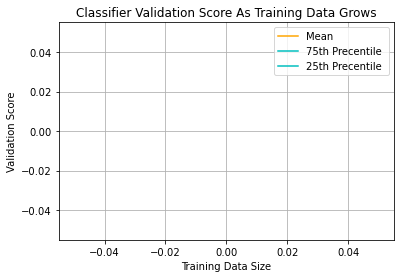

In [39]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

#np.random.seed(0)
#X, y = load_iris(return_X_y=True)
#indices = np.arange(y.shape[0])
#np.random.shuffle(indices)
#X, y = X[indices], y[indices]

train_sizes, train_scores, valid_scores = learning_curve(SGDClassifier(penalty='l1',loss='log',alpha=0.00001),
                                                         X_train, y_train, train_sizes=[10,20,30,40,50,60,70,80,90,100,
                                                                                         110,120,130,140,150,160,170,180,190,200,
                                                                                         210,220,230,240,250,260,270,280,290,300,
                                                                                         310,320,330,340,350,360,370,380,390,400,
                                                                                        410,420,430],cv=5)
pd.DataFrame({'Mean':list(pd.DataFrame(valid_scores.transpose()).median()),
             '75th Precentile ':list(pd.DataFrame(valid_scores.transpose()).quantile(0.75)),
             '25th Precentile':list(pd.DataFrame(valid_scores.transpose()).quantile(0.25))},
             index=train_sizes).plot(color = ['orange', 'c','c'],
                                    xlabel='Training Data Size',ylabel='Validation Score',
                                     grid=True,title='Classifier Validation Score As Training Data Grows')

In [37]:
pd.DataFrame(valid_scores.transpose()).mean().plot()

NameError: name 'valid_scores' is not defined

In [38]:
pd.DataFrame(pd.DataFrame(valid_scores.transpose())).plot()

NameError: name 'valid_scores' is not defined